# Biostat 257 Homework 1

### Yixuan Zhou (UID 505 524 487)

#### Due Apr 15 @ 11:59PM

## Q1

**No handwritten homework reports are accepted for this course.**  We work with Git/GitHub.  Efficient and abundant use of Git, e.g., **frequent and well-documented** commits, is an important criterion for grading your homework.

1. If you don't have a GitHub account, apply for the [Student Developer Pack](https://education.github.com/pack) at GitHub using your UCLA email.

2. Create a **private** repository `biostat-257-2022-spring` and add `Hua-Zhou` and `maschepps` (TA) as your collaborators.

3. Top directories of the repository should be `hw1`, `hw2`, ... You may create other branches for developing your homework solutions; but the `master` branch will be your presentation area. Put your homework submission files (Jupyter notebook `.ipynb`, html converted from notebook, all code and data set to reproduce results) in the `master` branch. 

4. After each homework due date, teaching assistant and instructor will check out your `master` branch for grading. Tag each of your homework submissions with tag names `hw1`, `hw2`, ...  Tagging time will be used as your submission time. That means if you tag your hw1 submission after deadline, penalty points will be deducted for late submission.  

5. Read the [style guide](https://github.com/johnmyleswhite/Style.jl) for Julia programming. Following rules in the style guide will be strictly enforced when grading: (4) four space indenting rule, (6) 80 charcter rule, (7) space after comma rule, (8) no space before comma rule, (9) space around operator rule.

## Q2

Let's check whether floating-point numbers obey certain algebraic rules. For 2-5, one counter-example suffices.

1. Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

2. Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

3. Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`?  

4. Is `0 * x == 0` true for all floating-point number `x`? 

5. Is `x / a == x * (1 / a)` always true?

**Solution to 2.1**

In [1]:
x = 0.1
y = 0.1
z = 1.0

1.0

In [2]:
(x + y) + z

1.2

In [3]:
x + (y + z)

1.2000000000000002

Floating-point numbers do not always obey the associative rule. Changing the order of summation changes the order of how the floating points are shifted and the order of rounding floating numbers. 

**Solution to 2.2**

In [4]:
x = 0.1
y = 0.2
z = 0.3
(x * y) * z

0.006000000000000001

In [5]:
x * (y * z)

0.006

The floating-point numbers do not always obey the associative rule for multiplication for the same reasons as 2.1. 

**Solution to 2.3**

In [6]:
a = 0.666666
x = 0.1
y = 0.2
a * (x + y)

0.19999980000000003

In [7]:
a * x + a * y

0.1999998

The floating-point numbers do not always obey the distributive rule. 

**Solution to 2.4**

In [8]:
x = 1.10000000111
0 * x == 0

true

In [9]:
x = Inf
0 * x == 0

false

In [10]:
x = -Inf
0 * x == 0

false

In [11]:
x = NaN
0 * x == 0

false

We see that `0 * x == 0` is true for all x as a real number, but it is not true if x is positive or negative infinity or NaN.  

**Solution to 2.5**

In [12]:
x = 100000000
a = 0.0000000356
x / a == x * (1 / a)

false

In [13]:
x = 1.0
a = NaN
x / a == x * (1 / a)

false

In [14]:
x = 0
a = 0
x / a == x * (1 / a)

false

We see that `x / a == x * (1 / a)` is not always true.

## Q3

Consider Julia function
```julia
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end
```
1. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Int64` input.   
2. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Float64` input.  
3. Compare the bitcode from questions 1 and 2. What do you find?  
4. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  

```julia
function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end
```
    Explain what does macro `@fastmath` do?

**Solution to 3.1**

In [15]:
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end

g (generic function with 1 method)

In [16]:
k = 2 # Int64
@code_llvm g(k)

;  @ In[15]:1 within `g`
define i64 @julia_g_1305(i64 signext %0) #0 {
top:
;  @ In[15]:3 within `g`
; ┌ @ int.jl:88 within `*`
   %1 = mul i64 %0, 9765625
; └
; ┌ @ int.jl:86 within `-`
   %2 = add i64 %1, -2441406
; └
;  @ In[15]:5 within `g`
  ret i64 %2
}


**Solution to 3.2**

In [17]:
k = 2.0 #Float64
@code_llvm g(k)

;  @ In[15]:1 within `g`
define double @julia_g_1335(double %0) #0 {
top:
;  @ In[15]:3 within `g`
; ┌ @ promotion.jl:380 within `*` @ float.jl:405
   %1 = fmul double %0, 5.000000e+00
; └
; ┌ @ promotion.jl:381 within `-` @ float.jl:402
   %2 = fadd double %1, -1.000000e+00
; └
; ┌ @ promotion.jl:380 within `*` @ float.jl:405
   %3 = fmul double %2, 5.000000e+00
; └
; ┌ @ promotion.jl:381 within `-` @ float.jl:402
   %4 = fadd double %3, -1.000000e+00
; └
; ┌ @ promotion.jl:380 within `*` @ float.jl:405
   %5 = fmul double %4, 5.000000e+00
; └
; ┌ @ promotion.jl:381 within `-` @ float.jl:402
   %6 = fadd double %5, -1.000000e+00
; └
; ┌ @ promotion.jl:380 within `*` @ float.jl:405
   %7 = fmul double %6, 5.000000e+00
; └
; ┌ @ promotion.jl:381 within `-` @ float.jl:402
   %8 = fadd double %7, -1.000000e+00
; └
; ┌ @ promotion.jl:380 within `*` @ float.jl:405
   %9 = fmul double %8, 5.000000e+00
; └
; ┌ @ promotion.jl:381 within `-` @ float.jl:402
   %10 = fadd double %9, -1.000000e+00

**Solution to 3.3**

More floating number calculations are needed to run the function than integer calculations. 

**Solution to 3.4**

In [18]:
function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end

g_fastmath (generic function with 1 method)

In [19]:
k = 2 # Int64
@code_llvm g_fastmath(k)

;  @ In[18]:1 within `g_fastmath`
define i64 @julia_g_fastmath_1362(i64 signext %0) #0 {
top:
;  @ In[18]:3 within `g_fastmath`
; ┌ @ fastmath.jl:270 within `mul_fast`
; │┌ @ int.jl:88 within `*`
    %1 = mul i64 %0, 9765625
; └└
; ┌ @ fastmath.jl:270 within `sub_fast`
; │┌ @ int.jl:86 within `-`
    %2 = add i64 %1, -2441406
; └└
;  @ In[18]:5 within `g_fastmath`
  ret i64 %2
}


In [20]:
k = 2.0 # Float64
@code_llvm g_fastmath(k)

;  @ In[18]:1 within `g_fastmath`
define double @julia_g_fastmath_1364(double %0) #0 {
top:
;  @ In[18]:3 within `g_fastmath`
; ┌ @ fastmath.jl:267 within `mul_fast` @ fastmath.jl:167
   %1 = fmul fast double %0, 0x4162A05F20000000
; └
; ┌ @ fastmath.jl:267 within `sub_fast` @ fastmath.jl:166
   %2 = fadd fast double %1, 0xC142A05F00000000
; └
;  @ In[18]:5 within `g_fastmath`
  ret double %2
}


`@fastmath` finds a faster but less accurate version of the operations needed in the function. Therefore, we see similar speed when we use either an integer or a floating number as input. 

## Q4

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`.   

1. Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1` at points `x`.  

2. Plot the polynomial `y = (x - 1)^7` at points `x`.  

3. Explain what you found.

**Solution 4.1**

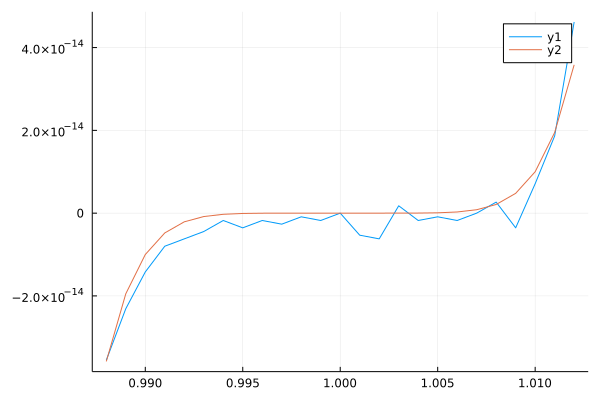

In [21]:
using Plots
x = collect(0.988:0.001:1.012)
y1 = [x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1 
      for x in 0.988:0.001:1.012]
y2 = [(x - 1)^7 for x in 0.988:0.001:1.012]
plot(x, y1)
plot!(x, y2)

In the expanded expression, calculations of floating numbers are rounded at every step, making the sum less accurate than evaluating the 2nd expression, which involves fewer rounding steps. 

## Q5

1. Show the **Sherman-Morrison formula**
$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one  perturbation of $\mathbf{A}$.

2. Show the **Woodbury formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. In many applications $m$ is much smaller than $n$. Woodbury formula generalizes Sherman-Morrison and is valuable because the smaller matrix $\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}$ is cheaper to invert than the larger matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

3. Show the **binomial inversion formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A}$ and $\mathbf{B}$ are nonsingular.

4. Show the identity
$$
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}).
$$
This formula is useful for evaluating the density of a multivariate normal with covariance matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

**Hint**: 1 and 2 are special cases of 3.

**Solution 5.1**

\begin{align}
(\mathbf{A} &+ \mathbf{u} \mathbf{u}^T)(\mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1}) \\
&= \mathbf{I}_n - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1} + \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}}\mathbf{u} \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1} \\
&= \mathbf{I}_n + \mathbf{u}\mathbf{u}^T\mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{u}(1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u} ) \mathbf{u}^T \mathbf{A}^{-1} \\
&= \mathbf{I}_n + \mathbf{u}\mathbf{u}^T\mathbf{A}^{-1} - \mathbf{u}\mathbf{u}^T\mathbf{A}^{-1} \\
&= \mathbf{I}_n \\
(\mathbf{A}^{-1} &- \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1}) (\mathbf{A} + \mathbf{u} \mathbf{u}^T) \\
&= \mathbf{I}_n - \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} (\mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T + \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T) \\
&= \mathbf{I}_n - \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} (1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}) \mathbf{u}^T \\
&= \mathbf{I}_n - \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T + \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \\
&= \mathbf{I}_n
\end{align}

**Solution 5.2**

\begin{align}
(\mathbf{A} &+ \mathbf{U} \mathbf{V}^T) [\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}] \\
&= \mathbf{I}_n - \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} + \mathbf{U} \mathbf{V}^T \mathbf{A}^{-1} - \mathbf{U} \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} \\
&= \mathbf{I}_n + \mathbf{U} \mathbf{V}^T \mathbf{A}^{-1} - \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}) (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} \\
&= \mathbf{I}_n + \mathbf{U} \mathbf{V}^T \mathbf{A}^{-1} - \mathbf{U} \mathbf{V}^T \mathbf{A}^{-1} \\
&= \mathbf{I}_n \\
[\mathbf{A}^{-1} &- \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}] (\mathbf{A} + \mathbf{U} \mathbf{V}^T) \\
&= \mathbf{I}_n + \mathbf{A}^{-1} \mathbf{U} \mathbf{V}^T - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} \mathbf{V}^T \\
&= \mathbf{I}_n + \mathbf{A}^{-1} \mathbf{U} \mathbf{V}^T - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}) \mathbf{V}^T \\
&= \mathbf{I}_n + \mathbf{A}^{-1} \mathbf{U} \mathbf{V}^T - \mathbf{A}^{-1} \mathbf{U} \mathbf{V}^T \\
&= \mathbf{I}_n
\end{align}

**Solution 5.3**

\begin{align}
(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} &= \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} \\
&=\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} \mathbf{B} \mathbf{B}^{-1} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{B}^{-1} \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1} \\
&= \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} \mathbf{B} [\mathbf{B} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}) \mathbf{B}]^{-1} \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1} \\
&= \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} \mathbf{B} (\mathbf{B} + \mathbf{B}\mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} \mathbf{B}) \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1}
\end{align}    

Using this expression of $(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1}$, 

\begin{align}
(\mathbf{A} &+ \mathbf{U} \mathbf{B} \mathbf{V}^T) [\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} \mathbf{B} (\mathbf{B} + \mathbf{B}\mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} \mathbf{B}) \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1}] \\
&= \mathbf{I}_n + \mathbf{U} \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1} - \mathbf{U} \mathbf{B} (\mathbf{B} + \mathbf{B}\mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} \mathbf{B})^{-1} \mathbf{B} \mathbf{V} \mathbf{A}^{-1} - \mathbf{U} \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} \mathbf{B} (\mathbf{B} + \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} \mathbf{B})^{-1} \mathbf{B} \mathbf{V} \mathbf{A}^{-1} \\
&= \mathbf{I}_n + \mathbf{U} \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1} - \mathbf{U} (\mathbf{B} + \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} \mathbf{B}) (\mathbf{B} + \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} \mathbf{B})^{-1}  \mathbf{B} \mathbf{V} \mathbf{A}^{-1} \\
&= \mathbf{I}_n + \mathbf{U} \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1} - \mathbf{U} \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1} \\
&= \mathbf{I}_n \\
[\mathbf{A}^{-1} &- \mathbf{A}^{-1} \mathbf{U} \mathbf{B} (\mathbf{B} + \mathbf{B}\mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} \mathbf{B}) \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1}] (\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T) \\
&= \mathbf{I}_n + \mathbf{A}^{-1} \mathbf{U} \mathbf{B} \mathbf{V}^T - \mathbf{A}^{-1} \mathbf{U} \mathbf{B} (\mathbf{B} + \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} \mathbf{B})^{-1} (\mathbf{B} + \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} \mathbf{B}) \mathbf{V}^T \\
&= \mathbf{I}_n + \mathbf{A}^{-1} \mathbf{U} \mathbf{B} \mathbf{V}^T - \mathbf{A}^{-1} \mathbf{U} \mathbf{B} \mathbf{V}^T \\
&= \mathbf{I}_n
\end{align} 

**Solution 5.4**

First let $\mathbf{M} = \begin{bmatrix} \mathbf{I}_m & -\mathbf{U} \\ \mathbf{V}^T & \mathbf{I}_n \end{bmatrix}$. Then $\mathbf{M} = \text{det} (\mathbf{I}_m) \text{det} (\mathbf{I}_n - \mathbf{V}^T (\mathbf{I}_m)^{-1} \mathbf{U}) = \text{det} (\mathbf{I}_n - \mathbf{V}^T \mathbf{U})$. Using this result, 

\begin{align}
\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) &= 
    \text{det}(\mathbf{A} \mathbf{A}^{-1} \mathbf{A} + \mathbf{U} \mathbf{V}^T \mathbf{A}^{-1} \mathbf{A}) \\
    &= \text{det}[(\mathbf{I}_n + \mathbf{U} \mathbf{V}^T \mathbf{A}^{-1}) \mathbf{A}] \\
    &= \text{det}(\mathbf{I}_n + \mathbf{U} \mathbf{V}^T \mathbf{A}^{-1}) \text{det} (\mathbf{A}) \\
    &= \text{det}(\mathbf{I}_n + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} ) \text{det} (\mathbf{A}) 
\end{align}

## Q6

Demonstrate the following facts about triangular and orthogonal matrices in Julia (one example for each fact). Mathematically curious ones are also encouraged to prove them. 

Note a unit triangular matrix is a triangular matrix with all diagonal entries being 1.

1. The product of two upper (lower) triangular matrices is upper (lower) triangular.

2. The inverse of an upper (lower) triangular matrix is upper (lower) triangular.

3. The product of two unit upper (lower) triangular matrices is unit upper (lower) triangular.

4. The inverse of a unit upper (lower) triangular matrix is unit upper (lower) triangular.

5. An orthogonal upper (lower) triangular matrix is diagonal. (You just need to prove this.)

6. The product of two orthogonal matrices is orthogonal.

**Solution 6.1**

In [22]:
using LinearAlgebra

n = 5
A = UpperTriangular(randn(n, n))

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 0.789019  0.377184  -0.166085    0.711715  -0.111312
  ⋅        2.30437   -1.27073    -0.694692   1.95974
  ⋅         ⋅         0.0581141   0.192228  -2.11465
  ⋅         ⋅          ⋅          0.194627   0.853956
  ⋅         ⋅          ⋅           ⋅         1.23838

In [23]:
B = UpperTriangular(randn(n, n))

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 0.416999  -0.0948742   0.496361  -0.724097    1.26393
  ⋅         1.14354    -0.642102   0.0475045   1.0277
  ⋅          ⋅          0.372532   1.92379    -0.143981
  ⋅          ⋅           ⋅        -0.339999   -0.453877
  ⋅          ⋅           ⋅          ⋅         -0.276843

In [24]:
A * B

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 0.32902  0.35647   0.0875754  -1.1149      1.1166
  ⋅       2.63515  -1.95303    -2.09895     2.32394
  ⋅        ⋅        0.0216493   0.0464423   0.489812
  ⋅        ⋅         ⋅         -0.066173   -0.324748
  ⋅        ⋅         ⋅           ⋅         -0.342837

**Solution 6.2**

In [25]:
A = UpperTriangular(randn(n, n))

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 0.517734   0.958519  -0.463882  -1.2256     0.48071
  ⋅        -1.03979   -0.48793    0.41613    1.38082
  ⋅          ⋅         0.521829   0.911189  -0.844706
  ⋅          ⋅          ⋅        -0.971195  -0.861787
  ⋅          ⋅          ⋅          ⋅        -0.175025

In [26]:
inv(A)

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 1.93149   1.78053    3.38188   1.49839   -4.34738
  ⋅       -0.961736  -0.89926  -1.25578    2.9358
  ⋅         ⋅         1.91634   1.79793  -18.1012
  ⋅         ⋅          ⋅       -1.02966    5.06982
  ⋅         ⋅          ⋅         ⋅        -5.71346

**Solution 6.3**

In [27]:
A = UnitUpperTriangular(randn(n, n))

5×5 UnitUpperTriangular{Float64, Matrix{Float64}}:
 1.0  0.716453   0.381884   -1.56034    0.234319
  ⋅   1.0       -0.0165212  -0.36772    0.0865125
  ⋅    ⋅         1.0        -0.916257  -0.665744
  ⋅    ⋅          ⋅          1.0       -0.695259
  ⋅    ⋅          ⋅           ⋅         1.0

In [28]:
B = UnitUpperTriangular(randn(n, n))

5×5 UnitUpperTriangular{Float64, Matrix{Float64}}:
 1.0  0.830835  -0.483506   1.00252   -0.551762
  ⋅   1.0        1.07098   -0.262255  -0.228301
  ⋅    ⋅         1.0       -1.43042   -0.475981
  ⋅    ⋅          ⋅         1.0        0.32029
  ⋅    ⋅          ⋅          ⋅         1.0

In [29]:
A * B

5×5 UnitUpperTriangular{Float64, Matrix{Float64}}:
 1.0  1.54729  0.665683  -1.29197   -1.16254
  ⋅   1.0      1.05446   -0.606343  -0.251701
  ⋅    ⋅       1.0       -2.34668   -1.43519
  ⋅    ⋅        ⋅         1.0       -0.374969
  ⋅    ⋅        ⋅          ⋅         1.0

**Solution 6.4**

In [30]:
A = UnitUpperTriangular(randn(n, n))

5×5 UnitUpperTriangular{Float64, Matrix{Float64}}:
 1.0  1.81547  -0.164907   0.226502   -2.26973
  ⋅   1.0      -1.33587   -0.825433   -1.14198
  ⋅    ⋅        1.0       -0.0866018   0.566497
  ⋅    ⋅         ⋅         1.0         0.421545
  ⋅    ⋅         ⋅          ⋅          1.0

In [31]:
inv(A)

5×5 UnitUpperTriangular{Float64, Matrix{Float64}}:
 1.0  -1.81547  -2.26032  -1.9208      2.28667
  ⋅    1.0       1.33587   0.941122   -0.0115113
  ⋅     ⋅        1.0       0.0866018  -0.603003
  ⋅     ⋅         ⋅        1.0        -0.421545
  ⋅     ⋅         ⋅         ⋅          1.0

**Solution 6.5**

An orthogonal upper (lower) triangular matrix is diagonal.
Let M be an orthogonal upper triangular matrix. Then $M'M = M^{-1}M = I$. M' is lower triangular, and $M^{-1}$ is also upper triangular from (2). Therefore, $M'$ and $M^{-1}$ are diagonal, which makes $M$ also a diagonal matrix. 

**Solution 6.6**

In [32]:
Q1, R1 = qr(rand(n,n)) # Q1 is orthogonal
Q2, R2 = qr(rand(n,n)) # Q2 is orthogonal

LinearAlgebra.QRCompactWY{Float64, Matrix{Float64}}
Q factor:
5×5 LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}}:
 -0.598321    0.204166    0.349841    0.55664   -0.409989
 -0.171705   -0.681469    0.0776085   0.430079   0.561361
 -0.152677   -0.690358   -0.0471328  -0.337625  -0.619583
 -0.0180622  -0.0131375   0.8823     -0.431357   0.187027
 -0.767394    0.130955   -0.301518   -0.452906   0.312922
R factor:
5×5 Matrix{Float64}:
 -0.727149  -1.11547  -1.18485   -0.799686   -1.45091
  0.0       -1.05458  -0.961228  -0.30684    -0.795069
  0.0        0.0       1.02481    0.0932309   0.3849
  0.0        0.0       0.0       -0.502923   -0.0638076
  0.0        0.0       0.0        0.0        -0.327758

In [33]:
transpose(Q1) * Q1

5×5 Matrix{Float64}:
  1.0           1.66533e-16  -8.32667e-17  -5.55112e-17   5.55112e-17
  1.66533e-16   1.0          -2.77556e-17  -8.32667e-17  -3.33067e-16
 -8.32667e-17  -2.77556e-17   1.0           0.0          -1.11022e-16
 -5.55112e-17  -8.32667e-17   0.0           1.0           5.55112e-17
  5.55112e-17  -3.33067e-16  -1.11022e-16   5.55112e-17   1.0

In [34]:
Q1 * transpose(Q1)

5×5 Matrix{Float64}:
 1.0           3.33067e-16   5.55112e-17   2.77556e-17   0.0
 3.33067e-16   1.0           1.11022e-16  -4.16334e-17  -2.22045e-16
 5.55112e-17   1.11022e-16   1.0          -1.52656e-16  -2.35922e-16
 2.77556e-17  -4.16334e-17  -1.52656e-16   1.0           2.08167e-17
 0.0          -2.22045e-16  -2.35922e-16   2.08167e-17   1.0

In [35]:
transpose(Q2) * Q2

5×5 Matrix{Float64}:
  1.0          -5.55112e-17  -8.32667e-17  -1.66533e-16   2.22045e-16
 -5.55112e-17   1.0           6.93889e-18   5.55112e-17   2.08167e-17
 -8.32667e-17   6.93889e-18   1.0          -1.38778e-16  -2.77556e-16
 -1.66533e-16   5.55112e-17  -1.38778e-16   1.0          -4.16334e-16
  2.22045e-16   2.08167e-17  -2.77556e-16  -4.16334e-16   1.0

In [36]:
Q2 * transpose(Q2)

5×5 Matrix{Float64}:
  1.0          -3.33067e-16   3.88578e-16   1.38778e-17   2.77556e-16
 -3.33067e-16   1.0           2.77556e-16   1.38778e-17   2.498e-16
  3.88578e-16   2.77556e-16   1.0          -1.38778e-17  -2.498e-16
  1.38778e-17   1.38778e-17  -1.38778e-17   1.0          -4.85723e-17
  2.77556e-16   2.498e-16    -2.498e-16    -4.85723e-17   1.0

In [37]:
Q = Q1 * Q2

5×5 Matrix{Float64}:
  0.664118   0.456106    0.240791  -0.0787726  -0.535472
 -0.268012   0.0396726  -0.184026  -0.911931   -0.247209
  0.305655   0.509221   -0.244255  -0.217637    0.735012
  0.302469  -0.215757   -0.888254   0.143078   -0.229119
  0.549732  -0.696087    0.243924  -0.307149    0.24376

In [38]:
transpose(Q) * Q

5×5 Matrix{Float64}:
  1.0          -7.33834e-17  -3.3561e-17   -1.48083e-16   1.57301e-16
 -7.33834e-17   1.0          -1.3254e-16   -2.57858e-16   1.47841e-16
 -3.3561e-17   -1.3254e-16    1.0          -1.58426e-16  -2.1897e-16
 -1.48083e-16  -2.57858e-16  -1.58426e-16   1.0          -2.01703e-16
  1.57301e-16   1.47841e-16  -2.1897e-16   -2.01703e-16   1.0

In [39]:
Q * transpose(Q)

5×5 Matrix{Float64}:
  1.0           1.75231e-17   2.09002e-16  -2.9132e-18    1.05836e-16
  1.75231e-17   1.0           8.71145e-17  -2.19481e-16  -3.41599e-16
  2.09002e-16   8.71145e-17   1.0           3.22166e-17  -9.81905e-17
 -2.9132e-18   -2.19481e-16   3.22166e-17   1.0           1.87928e-16
  1.05836e-16  -3.41599e-16  -9.81905e-17   1.87928e-16   1.0

We see that Q is also an orthogonal matrix. 